In [8]:
from data import load_us_perm_visas 

X, y = load_us_perm_visas()
print('decision_date' in X.columns)
print('decision_date_year' in X.columns)

True
False


In [2]:
X

,decision_date,employer_name,employer_city,employer_state,job_info_work_city,job_info_work_state,pw_soc_code,pw_unit_of_pay_9089,pw_source_name_9089,pw_soc_title,country_of_citizenship,class_of_admission,pw_level_9089,pw_amount_9089,wage_offer_unit_of_pay_9089
0,2012-02-01,netsoft usa inc.,new york,ny,new york,ny,15-1031.00,yr,oes,"computer software engineers, applications",NaN,j-1,level ii,75629.0,yr
1,2011-12-21,pinnacle environemntal corp,carlstadt,ny,new york,ny,47-4041.00,yr,oes,hazardous materials removal workers,NaN,b-2,level i,37024.0,yr
2,2011-12-01,"schnabel engineering, inc.",glen allen,va,lutherville,md,17-2051.00,yr,oes,civil engineers,NaN,h-1b,level i,47923.0,yr
3,2011-12-01,ebenezer mission church,flushing,ny,flushing,ny,43-4071.00,hr,oes,file clerks,NaN,b-2,level ii,10.97,hr
4,2012-01-26,albany international corp.,albany,ny,albany,ny,41-9031.00,yr,oes,sales engineers,NaN,l-1,level iv,94890.0,yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374349,2016-12-30,pomeroy it solutions sales company,hebron,ky,frankfort,ky,15-1132,yr,oes,"software developers, applications",india,h-1b,level iv,"84,635.00",yr
374350,2016-12-30,siemens plm software inc.,milford,oh,milford,oh,15-1132,yr,oes,"software developers, applications",india,h-1b,level ii,"69,098.00",yr
374351,2016-12-30,globallogic inc.,san jose,ca,san jose,ca,15-1121,yr,oes,computer systems analysts,india,l-1,level iii,"114,795.00",yr
374352,2016-12-30,deutsche bank trust company americas,new york,ny,new york,ny,15-1122,yr,other,information security analysts,india,h-1b,NaN,"112,354.00",yr


In [3]:
uniques = X['pw_unit_of_pay_9089'].unique()
print(uniques)

['yr', 'hr', NaN, 'bi', 'mth', 'wk']
Categories (5, object): ['bi', 'hr', 'mth', 'wk', 'yr']


In [9]:
from sklearn.model_selection import train_test_split
from tabpfn import TabPFNClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
# # Encode categorical features
# cat_cols = X.select_dtypes(include=['object', 'category']).columns
# if len(cat_cols) > 0:
#     encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
#     X[cat_cols] = encoder.fit_transform(X[cat_cols])

X_small = X[:11000]
y_small = y[:11000]

X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.1, random_state=42)

In [ ]:
# Ignore FutureWarning, of which TabPFNClassifier has a lot!
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
# Initialize a classifier
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

TabPFNClassifier()

In [9]:
# Predict labels
predictions = clf.predict(X_test)

In [42]:
print("Accuracy", accuracy_score(y_test, predictions))

Accuracy 0.8136363636363636


In [43]:
# Calculate F1 score with macro averaging
print("F1 Score (macro):", f1_score(y_test, predictions, average='macro'))

# Calculate F1 score with macro averaging
print("F1 Score (micro):", f1_score(y_test, predictions, average='micro'))

# Or with weighted averaging
print("F1 Score (weighted):", f1_score(y_test, predictions, average='weighted'))

F1 Score (macro): 0.605492661813614
F1 Score (micro): 0.8136363636363636
F1 Score (weighted): 0.7753420905851193


In [44]:
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
predictions_encoded = le.transform(predictions)

# Now calculate F1 score with numeric labels
print("F1 Score:", f1_score(y_test_encoded, predictions_encoded))

F1 Score: 0.31893687707641194


In [45]:
# # Predict probabilities
# prediction_probabilities = clf.predict_proba(X_test)
# print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))


print("Accuracy", accuracy_score(y_test, predictions))

# Calculate and print F1 score
print("F1 Score:", f1_score(y_test, predictions, average='macro'))

# Classification Report
print("\nClassification Report:")
# print(classification_report(y_test, predictions, digits=3, output_dict=True))
print(classification_report(y_test, predictions, digits=3, output_dict=False))

## March 30
# Accuracy 0.83
# ROC AUC: 0.8062494903783433
# Accuracy 0.8136363636363636

## March 31
# Accuracy 0.8136363636363636

Accuracy 0.8136363636363636
F1 Score: 0.605492661813614

Classification Report:
              precision    recall  f1-score   support

   certified      0.828     0.967     0.892       876
      denied      0.623     0.214     0.319       224

    accuracy                          0.814      1100
   macro avg      0.726     0.591     0.605      1100
weighted avg      0.786     0.814     0.775      1100



In [13]:
def log_classification_report_metrics(report_dict):
    """
    Log each metric from a classification report dictionary to MLflow.
    
    Parameters:
    -----------
    report_dict : dict
        The dictionary returned by sklearn.metrics.classification_report with output_dict=True
    """
    # Loop through the top level dictionary
    for class_key, metrics in report_dict.items():
        # Check if the value is a dictionary (for class metrics)
        if isinstance(metrics, dict):
            # Log metrics for each class
            for metric_name, value in metrics.items():
                # Create a named metric with class and metric info
                metric_full_name = f"{metric_name}_{class_key}"
                mlflow.log_metric(metric_full_name, value)
        else:
            # For overall metrics like accuracy that aren't nested
            mlflow.log_metric(class_key, metrics)

In [14]:
# Predict labels
predictions = model.predict(X_test)

🏃 View run delicate-sow-908 at: http://127.0.0.1:8080/#/experiments/590767339689717016/runs/0bccd8ff02844211aa22ea473d1e6cc2
🧪 View experiment at: http://127.0.0.1:8080/#/experiments/590767339689717016


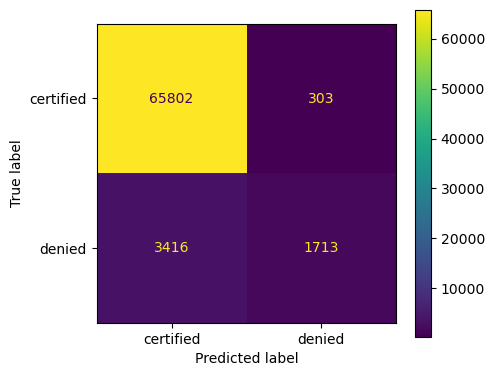

In [15]:
import mlflow

# Set our tracking server uri for logging
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Define the model hyperparameters
# params = {
#     "solver": "lbfgs",
#     "max_iter": 1000,
#     "multi_class": "auto",
#     "random_state": 8888,
# }

report_dict = classification_report(y_test, predictions, output_dict=True)

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    # mlflow.log_params(params)

    # Log the loss metric
    # mlflow.log_metric("accuracy", accuracy)

    log_classification_report_metrics(report_dict)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Dataset", "US Visa data")
    mlflow.set_tag("Model", "Random Forest")

    # Create confusion matrix plot
    fig, ax = plt.subplots(figsize=(5, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions, ax=ax)
    plt.tight_layout()

    # Save and log the figure
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

## trying out random forest

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify column types
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]
datetime_cols = [col for col in X_train.columns if pd.api.types.is_datetime64_dtype(X_train[col])]

# Extract useful features from datetime columns
for col in datetime_cols:
    # Extract components as new features
    X_train[f'{col}_year'] = X_train[col].dt.year
    X_train[f'{col}_month'] = X_train[col].dt.month
    X_train[f'{col}_day'] = X_train[col].dt.day
    
    # Do the same for test data
    X_test[f'{col}_year'] = X_test[col].dt.year
    X_test[f'{col}_month'] = X_test[col].dt.month
    X_test[f'{col}_day'] = X_test[col].dt.day
    
    # Drop original datetime columns
    X_train = X_train.drop(columns=[col])
    X_test = X_test.drop(columns=[col])

# Update numerical columns list to include the new datetime features
numerical_cols = [col for col in X_train.columns if pd.api.types.is_numeric_dtype(X_train[col])]

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create and run pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit on training data only
model.fit(X_train, y_train)

# Evaluate on test data
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.4f}")
# Model accuracy: 0.9478

Model accuracy: 0.9478


## From Dan

### Other models

In [7]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
predictions_rf = model.predict(X_test)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
# if you don't have GPU and cuda, change task_type
# note: catboost requires python 3.12, so need to set up a new evironment (ok, since tabpfn requires only python > 3.9)
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0:1')#, class_weights=class_weights)
model.fit(X_res,
          y_res)

### evals

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, recall_score, precision_score
predictions = model.predict(X_test)
print(classification_report(y_test, predictions, digits=3))

In [ ]:

from sklearn.metrics import f1_score, classification_report, confusion_matrix

f_scores['RF'] = f1_score(y_test_2, predictions, average='macro')
f_scores_micro['RF'] = f1_score(y_test_2, predictions, average='micro')

accuracy_scores['RF'] = precision_score(y_test_2, predictions, average='macro') #accuracy_score(y_test_2, predictions)
recall_scores['RF'] = recall_score(y_test_2, predictions, average='macro')


# print(f1_score(y_test, predictions, average='macro'))
print(classification_report(y_test_2, predictions, digits=3))
# print(confusion_matrix(y_test, predictions))